# Campus Recruitment Project
This data set consists of Placement data of students in a XYZ campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students.

The different columns of the data set are-
*   sl_no- Serial Number
*   gender- Gender- Male='M',Female='F'
*   ssc_p- Secondary Education percentage- 10th Grade
*   ssc_b- Board of Education- Central/ Others
*   hsc_p- Higher Secondary Education percentage- 12th Grade
* hsc_b- Board of Education- Central/ Others
*hsc_s- Specialization in Higher Secondary Education
*degree_p- Degree Percentage
*degree_t- Under Graduation(Degree type)- Field of degree education
*workex- Work Experience
*etest_p- Employability test percentage ( conducted by college)
*specialisation- Post Graduation(MBA)- Specialization
*mba_p- MBA percentage
*status- Status of placement- Placed/Not placed
*salary- Salary offered by corporate to candidates

In this project we will use various models to predict whether the students will get placement or not and we will also try to predict their salaries using linear regression.







In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
data = pd.read_csv('/content/drive/My Drive/Placement_Data_Full_Class.csv')

In [8]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [10]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


As the first column just contains the serial munbers of students, we can drop it.

In [11]:
data=data.drop('sl_no',axis=1)
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Exploratory Data Analysis

###Data Analysis for status column

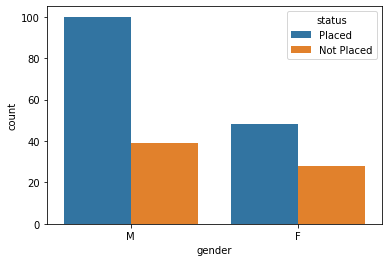

In [12]:
sns.countplot(hue='status',data=data,x='gender')

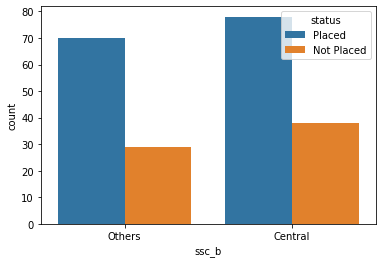

In [13]:
sns.countplot(hue='status',data=data,x='ssc_b')

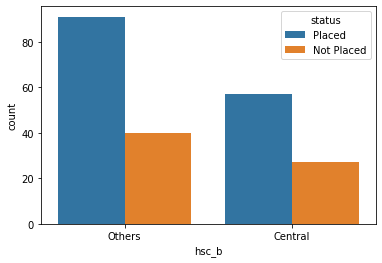

In [14]:
sns.countplot(hue='status',data=data,x='hsc_b')

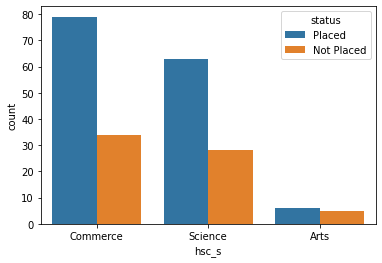

In [15]:
sns.countplot(hue='status',data=data,x='hsc_s')

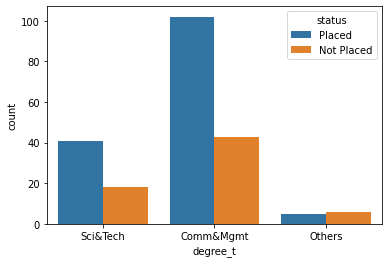

In [16]:
sns.countplot(hue='status',data=data,x='degree_t')

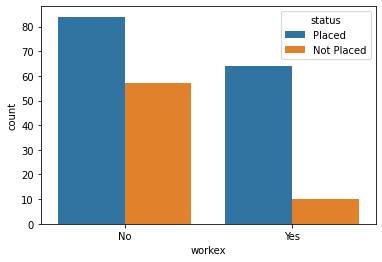

In [17]:
sns.countplot(hue='status',data=data,x='workex')

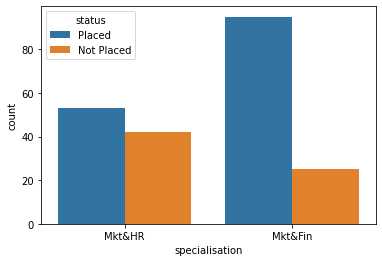

In [18]:
sns.countplot(x='specialisation',data=data,hue='status')

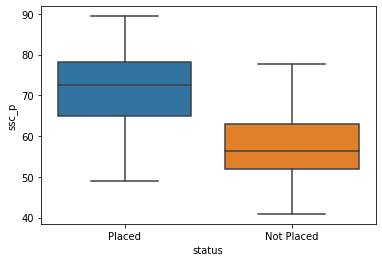

In [19]:
sns.boxplot(x='status',y='ssc_p',data=data)

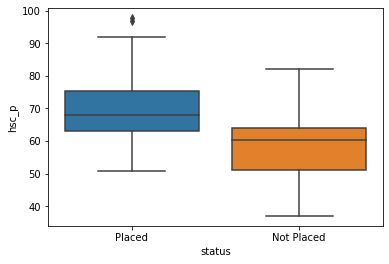

In [20]:
sns.boxplot(x='status',y='hsc_p',data=data)

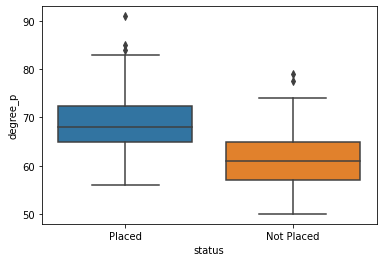

In [21]:
sns.boxplot(x='status',y='degree_p',data=data)

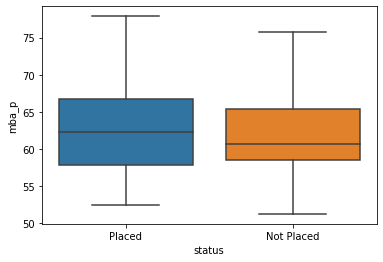

In [22]:
sns.boxplot(x='status',y='mba_p',data=data)

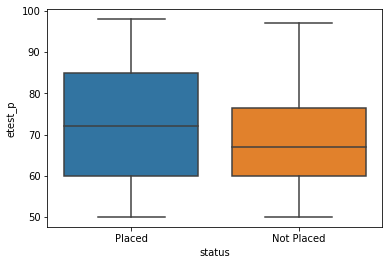

In [23]:
sns.boxplot(x='status',y='etest_p',data=data)

These plots show that the placement depends mostly on the school and UG marks, not so much on Employment Test or MBA percentage 

As status contains string values, we need to get dummy variable for it and drop the original column.

In [24]:
status_dummies=pd.get_dummies(data['status'],drop_first=True)

In [25]:
data=pd.concat([data.drop('status',axis=1),status_dummies],axis=1)
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,Placed
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0,1
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0,1
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,NaN,0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0,1


We need to do this for all other string columns.

In [26]:
dummies=pd.get_dummies(data[['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation']],drop_first=True)
data=data.drop(['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation'],axis=1)
data=pd.concat([data,dummies],axis=1)

In [27]:
data.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,Placed,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330,0.607889,-0.068969,0.116194,0.066996,-0.101323,0.189847,-0.066127,0.221235,0.175675,-0.172536
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819,0.491228,-0.021334,-0.137013,-0.019548,0.258093,-0.226675,-0.131382,-0.053599,0.141025,-0.241630
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272,0.479861,-0.173217,0.038070,0.067229,-0.022724,0.092006,-0.180408,0.123477,0.122648,-0.218286
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307,0.127639,0.084294,-0.018991,0.039108,-0.021732,0.055352,0.006907,0.009748,0.056735,-0.236315
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013,0.076922,-0.300531,0.083120,0.090201,-0.049415,0.048050,-0.036055,0.125009,0.168811,-0.105728
salary,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000,NaN,0.158912,0.005539,-0.007549,-0.014219,0.049547,-0.016573,0.172492,0.136920,-0.146576
Placed,0.607889,0.491228,0.479861,0.127639,0.076922,NaN,1.000000,0.090670,0.037297,0.016945,0.024414,0.007279,-0.117232,0.008688,0.276060,-0.250655
gender_M,-0.068969,-0.021334,-0.173217,0.084294,-0.300531,0.158912,0.090670,1.000000,0.019429,0.065945,-0.001087,0.042682,-0.093246,0.084072,0.085153,-0.106160
ssc_b_Others,0.116194,-0.137013,0.038070,-0.018991,0.083120,0.005539,0.037297,0.019429,1.000000,0.605883,-0.056671,0.058505,-0.002758,0.101060,-0.040744,-0.051565
hsc_b_Others,0.066996,-0.019548,0.067229,0.039108,0.090201,-0.007549,0.016945,0.065945,0.605883,1.000000,-0.073522,0.126446,-0.116920,0.086548,0.038357,0.002232


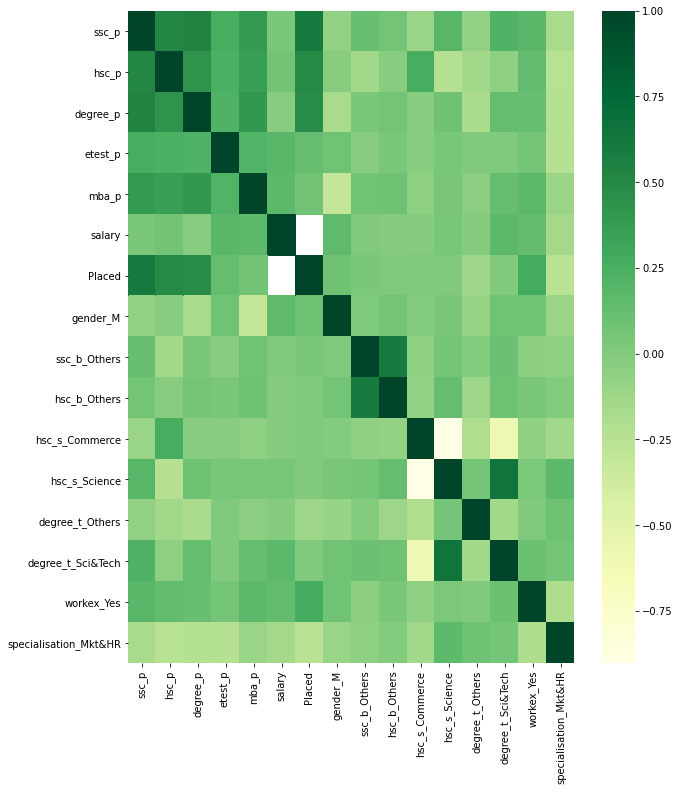

In [28]:
plt.figure(figsize=(10,12))
sns.heatmap(data.corr(),cmap='YlGn')

### Data Analysis for Salary

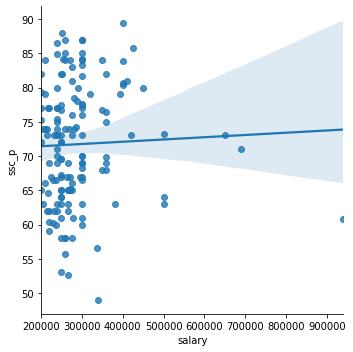

In [233]:
sns.lmplot(x='salary',y='ssc_p',data=data)

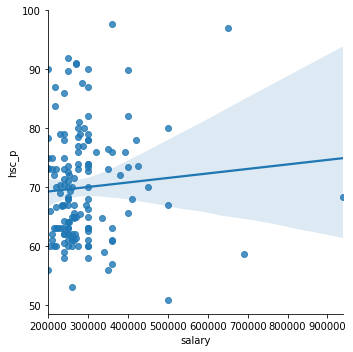

In [234]:
sns.lmplot(x='salary',y='hsc_p',data=data)

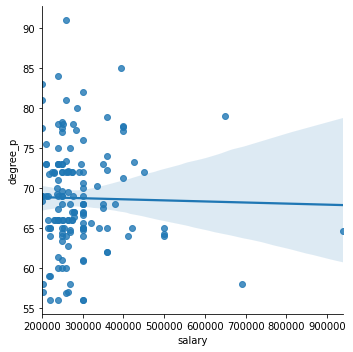

In [235]:
sns.lmplot(x='salary',y='degree_p',data=data)

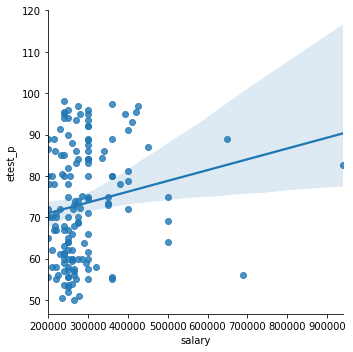

In [236]:
sns.lmplot(x='salary',y='etest_p',data=data)

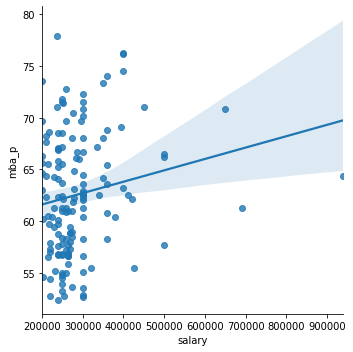

In [237]:
sns.lmplot(x='salary',y='mba_p',data=data)

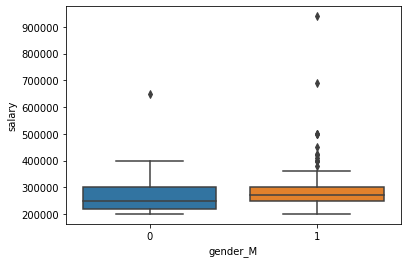

In [34]:
sns.boxplot(x='gender_M',y='salary',data=data)

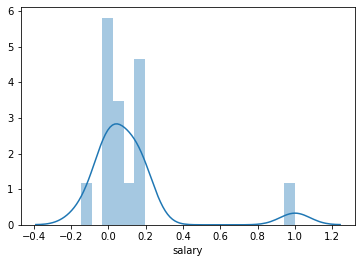

In [35]:
sns.distplot(data.corr()['salary'],bins=20)

This shows that salary doesn't really depend on any factor, still we will try to use Linear Regression to get a pattern.

#Making Models for Status

##Train Test Split

In [36]:
X=data.drop(['Placed','salary'],axis=1)
y=data['Placed']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##Logistics Regression Model

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
lm=LogisticRegression()

In [82]:
lm.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
pred=lm.predict(X_test)

In [84]:
from sklearn.metrics import classification_report,confusion_matrix

In [85]:
print(confusion_matrix(y_test,pred))

[[15  6]
 [ 4 40]]


In [86]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        21
           1       0.87      0.91      0.89        44

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.82        65
weighted avg       0.84      0.85      0.84        65



##Decision Tree Model

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dtc=DecisionTreeClassifier()

In [89]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [90]:
pred2=dtc.predict(X_test)

In [91]:
print(confusion_matrix(y_test,pred2))

[[14  7]
 [ 5 39]]


In [92]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70        21
           1       0.85      0.89      0.87        44

    accuracy                           0.82        65
   macro avg       0.79      0.78      0.78        65
weighted avg       0.81      0.82      0.81        65



##Random Forest Model

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
rf=RandomForestClassifier(n_estimators=200)

In [108]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [109]:
pred3=rf.predict(X_test)

In [110]:
print(confusion_matrix(y_test,pred3))

[[11 10]
 [ 2 42]]


In [113]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.85      0.52      0.65        21
           1       0.81      0.95      0.88        44

    accuracy                           0.82        65
   macro avg       0.83      0.74      0.76        65
weighted avg       0.82      0.82      0.80        65



##Neural Network Model

### Scaling the data

In [114]:
from sklearn.preprocessing import  MinMaxScaler

In [116]:
scaler=MinMaxScaler()

In [117]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [118]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

###Creating the model

In [121]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [122]:
X_train.shape

(150, 14)

In [319]:
model=Sequential()
#input layer
model.add(Dense(units=14,activation='relu'))
#hidden layer 1
model.add(Dense(units=10,activation='relu'))
#hidden layer 2
model.add(Dense(units=5,activation='relu'))
#output layer
model.add(Dense(units=1,activation='sigmoid'))

In [320]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [321]:
early_stop= EarlyStopping(mode='min',verbose=1,patience=30)

###Training and Evaluating the Model

In [322]:
model.fit(x=X_train,y=y_train,epochs=600,verbose=1,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
5/5 [==============================] - 0s 27ms/step - loss: 0.6481 - val_loss: 0.5985
Epoch 2/600
5/5 [==============================] - 0s 13ms/step - loss: 0.6364 - val_loss: 0.5886
Epoch 3/600
5/5 [==============================] - 0s 9ms/step - loss: 0.6264 - val_loss: 0.5804
Epoch 4/600
5/5 [==============================] - 0s 9ms/step - loss: 0.6147 - val_loss: 0.5751
Epoch 5/600
5/5 [==============================] - 0s 9ms/step - loss: 0.6085 - val_loss: 0.5699
Epoch 6/600
5/5 [==============================] - 0s 12ms/step - loss: 0.6016 - val_loss: 0.5660
Epoch 7/600
5/5 [==============================] - 0s 11ms/step - loss: 0.5951 - val_loss: 0.5631
Epoch 8/600
5/5 [==============================] - 0s 10ms/step - loss: 0.5905 - val_loss: 0.5606
Epoch 9/600
5/5 [==============================] - 1s 100ms/step - loss: 0.5863 - val_loss: 0.5580
Epoch 10/600
5/5 [==============================] - 0s 10ms/step - loss: 0.5809 - val_loss: 0.5560
Epoch 11/600
5/5 [===

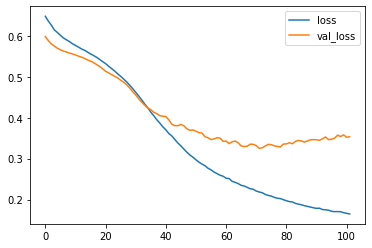

In [323]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [324]:
pred4= model.predict_classes(X_test)

In [325]:
print(confusion_matrix(y_test,pred4))

[[14  7]
 [ 4 40]]


In [326]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72        21
           1       0.85      0.91      0.88        44

    accuracy                           0.83        65
   macro avg       0.81      0.79      0.80        65
weighted avg       0.83      0.83      0.83        65



##Comparison of all the Models
All the models used have an accuracy of above 80%, but the best model among them is Logistic Regression with 85% accuracy.

#Making Model for Salary

## Train Test Split

In [173]:
data=data.dropna()
X=data.drop(['Placed','salary'],axis=1).values
y=data['salary'].values

In [166]:
data.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,Placed,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,67.00,91.00,58.00,55.0,58.80,270000.0,1,1,1,1,1,0,0,1,0,1
1,79.33,78.33,77.48,86.5,66.28,200000.0,1,1,0,1,0,1,0,1,1,0
2,65.00,68.00,64.00,75.0,57.80,250000.0,1,1,0,0,0,0,0,0,0,0
4,85.80,73.60,73.30,96.8,55.50,425000.0,1,1,0,0,1,0,0,0,0,0
7,82.00,64.00,66.00,67.0,62.14,252000.0,1,1,0,0,0,1,0,1,1,0


In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##Linear Regression Model

In [175]:
from sklearn.linear_model import LinearRegression

In [176]:
linr=LinearRegression()

In [177]:
linr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [178]:
pred5=linr.predict(X_test)
pred5

array([345974.30534722, 354944.41170727, 321390.77263035, 322583.53327418,
       274859.17300396, 268232.57806394, 281497.62892727, 319287.44605754,
       320106.20178765, 312071.19749585, 331816.31590804, 249273.5348958 ,
       314728.75766836, 266980.91556772, 227390.25436423, 298560.02399247,
       274893.16146015, 288287.58348327, 244586.82546051, 350781.78152989,
       282218.44164514, 229548.90527661, 354621.14135881, 307172.88282109,
       275480.26143902, 281692.95121008, 274516.22910248, 339797.89459875,
       329261.01690607, 348562.28814563, 290123.2328983 , 277986.80687269,
       294217.71891302, 204216.30621891, 348974.99407035, 279759.65505237,
       281883.84165104, 350393.10313497, 261889.46276638, 319502.96654245,
       352342.61021285, 366218.32465634, 292396.51443566, 299134.98796574,
       353935.70374873])

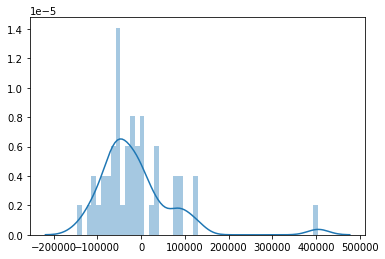

In [179]:
sns.distplot((y_test-pred5),bins=50)

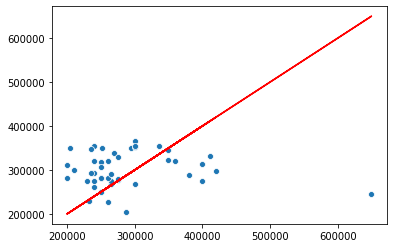

In [199]:
sns.scatterplot(x=y_test,y=pred5)
plt.plot(y_test,y_test,'r')

As seen from the above graphs, this model is not so good at predicting the Salaries of the students

## Neural Network Model

### Scaling Data

In [181]:
from sklearn.preprocessing import MinMaxScaler

In [182]:
scaler =MinMaxScaler()

In [183]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [184]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

###Creating Model

In [185]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping

In [186]:
X_train.shape

(103, 14)

In [212]:
model=Sequential()

#input layer
model.add(Dense(units=14,activation='relu'))
#hidden layer 1
model.add(Dense(units=10,activation='relu'))
#hidden layer 2
model.add(Dense(units=6,activation='relu'))
#hidden layer 3
model.add(Dense(units=3,activation='relu'))
#output layer
model.add(Dense(units=1))

model.compile(loss='mse',optimizer='adam')

In [213]:
early_stopping= EarlyStopping(verbose=1,mode='min',patience=20)

###Fitting Model

In [214]:
model.fit(x=X_train,y=y_train,epochs=1000,verbose=1,validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 1/1000
4/4 [==============================] - 0s 29ms/step - loss: 93241057280.0000 - val_loss: 89150332928.0000
Epoch 2/1000
4/4 [==============================] - 0s 10ms/step - loss: 93241049088.0000 - val_loss: 89150324736.0000
Epoch 3/1000
4/4 [==============================] - 0s 10ms/step - loss: 93241040896.0000 - val_loss: 89150308352.0000
Epoch 4/1000
4/4 [==============================] - 0s 10ms/step - loss: 93241024512.0000 - val_loss: 89150308352.0000
Epoch 5/1000
4/4 [==============================] - 0s 11ms/step - loss: 93241016320.0000 - val_loss: 89150291968.0000
Epoch 6/1000
4/4 [==============================] - 0s 11ms/step - loss: 93241008128.0000 - val_loss: 89150291968.0000
Epoch 7/1000
4/4 [==============================] - 0s 10ms/step - loss: 93241008128.0000 - val_loss: 89150291968.0000
Epoch 8/1000
4/4 [==============================] - 0s 11ms/step - loss: 93241008128.0000 - val_loss: 89150283776.0000
Epoch 9/1000
4/4 [==============================

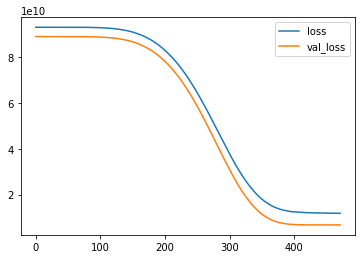

In [215]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [224]:
pred6=model.predict(X_test)


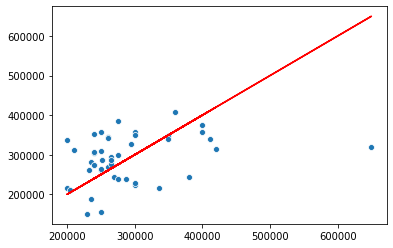

In [226]:
sns.scatterplot(x=y_test,y=pred6.flatten())
plt.plot(y_test,y_test,'r')

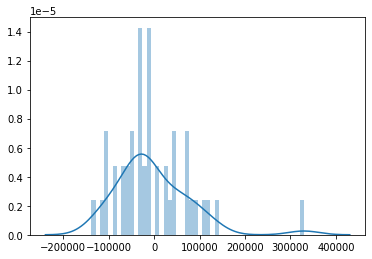

In [228]:
sns.distplot((y_test-pred6.flatten()),bins=50)

##Comparison of two Models

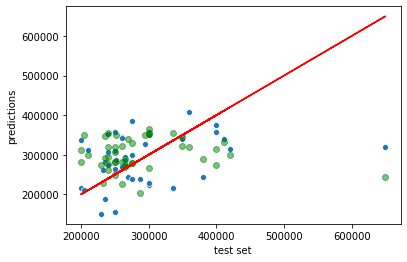

In [221]:
sns.scatterplot(x=y_test,y=pred6.flatten())
plt.scatter(x=y_test,y=pred5,c='green',alpha=0.5)
plt.xlabel('test set')
plt.ylabel('predictions')
plt.plot(y_test,y_test,'r')

The graph shows that both the models are approximately similiar. We will check the Mean Squared Error, Mean Absolute Error and Root Mean Squared Error of both models

In [229]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [230]:
print(mean_absolute_error(y_test,pred5))
print('\n')
print(mean_absolute_error(y_test,pred6.flatten()))

63721.685383592994


61192.39861111111


In [231]:
print(mean_squared_error(y_test,pred5))
print('\n')
print(mean_squared_error(y_test,pred6.flatten()))

8103907732.113463


6728596518.30778


In [232]:
print(np.sqrt(mean_squared_error(y_test,pred5)))
print('\n')
print(np.sqrt(mean_squared_error(y_test,pred6.flatten())))

90021.70700510773


82028.02276239371


The errors is less in the neural network model so it is better than linear regression, but as the error is too big in both the models, none of them are very good.